In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
file_path = "/Users/simonknudsen/Downloads/ESS11/ESS11.csv"  # Update file path if needed
df = pd.read_csv(file_path, low_memory=False)

In [40]:
# Handle missing data
print(df.info())  # Check missing values
df = df.dropna(subset=['edulvlb', 'edulvlfb', 'edulvlmb'])  # Drop rows missing key columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Columns: 640 entries, name to psu
dtypes: float64(228), int64(388), object(24)
memory usage: 196.1+ MB
None


In [41]:
# Education level grouping
education_groups = {
    # Higher Education
    510: "Higher Education", 520: "Higher Education",
    610: "Higher Education", 620: "Higher Education",
    710: "Higher Education", 720: "Higher Education",
    800: "Higher Education",

    # Upper Secondary
    311: "Upper Secondary", 312: "Upper Secondary",
    313: "Upper Secondary", 321: "Upper Secondary",
    322: "Upper Secondary", 323: "Upper Secondary",
    412: "Upper Secondary", 413: "Upper Secondary",
    421: "Upper Secondary", 422: "Upper Secondary",
    423: "Upper Secondary",

    # Lower Education
    0: "Lower Education", 113: "Lower Education",
    129: "Lower Education", 212: "Lower Education",
    213: "Lower Education", 221: "Lower Education",
    222: "Lower Education", 223: "Lower Education",
    229: "Lower Education",

    # Other
    5555: "Other"
}

In [42]:
# Apply the grouping
for col in ['edulvlb', 'edulvlfb', 'edulvlmb']:
    df[f'{col}_grouped'] = df[col].map(education_groups)

In [43]:
# Define features and target
target_variable = 'edulvlb_grouped'  # Grouped target variable
features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'hincfel', 'ppltrst', 'pplfair',
            'health', 'happy', 'stflife', 'gndr', 'agea', 'cntry']

In [44]:
# Separate features and target variable
X = df[features].copy()
y = df[target_variable].copy()

In [45]:
# Encode categorical variables
le = LabelEncoder()

In [46]:
# Encode the target variable
y = le.fit_transform(y)

In [47]:
# Encode categorical features
categorical_features = ['edulvlfb_grouped', 'edulvlmb_grouped', 'cntry', 'gndr']
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

In [48]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')  # Use 'saga' solver for better convergence
log_reg.fit(X_train, y_train)

/Users/simonknudsen/opt/anaconda3/envs/machinelearning/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')

In [51]:
# Evaluate the model
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [52]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.35057900635039224
Test Accuracy: 0.3504731075697211

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.47      0.50      0.49      2635
           1       0.40      0.46      0.42      1795
           2       0.01      0.33      0.01        27
           3       0.57      0.19      0.28      3550
           4       0.02      0.60      0.04        25

    accuracy                           0.35      8032
   macro avg       0.29      0.41      0.25      8032
weighted avg       0.50      0.35      0.38      8032



In [53]:
# Visualize feature importance
coefficients = log_reg.coef_[0]  # Coefficients for the logistic regression model
feature_names = X.columns
importance = np.abs(coefficients)

In [54]:
# Sort features by importance
sorted_idx = np.argsort(importance)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importance = importance[sorted_idx]

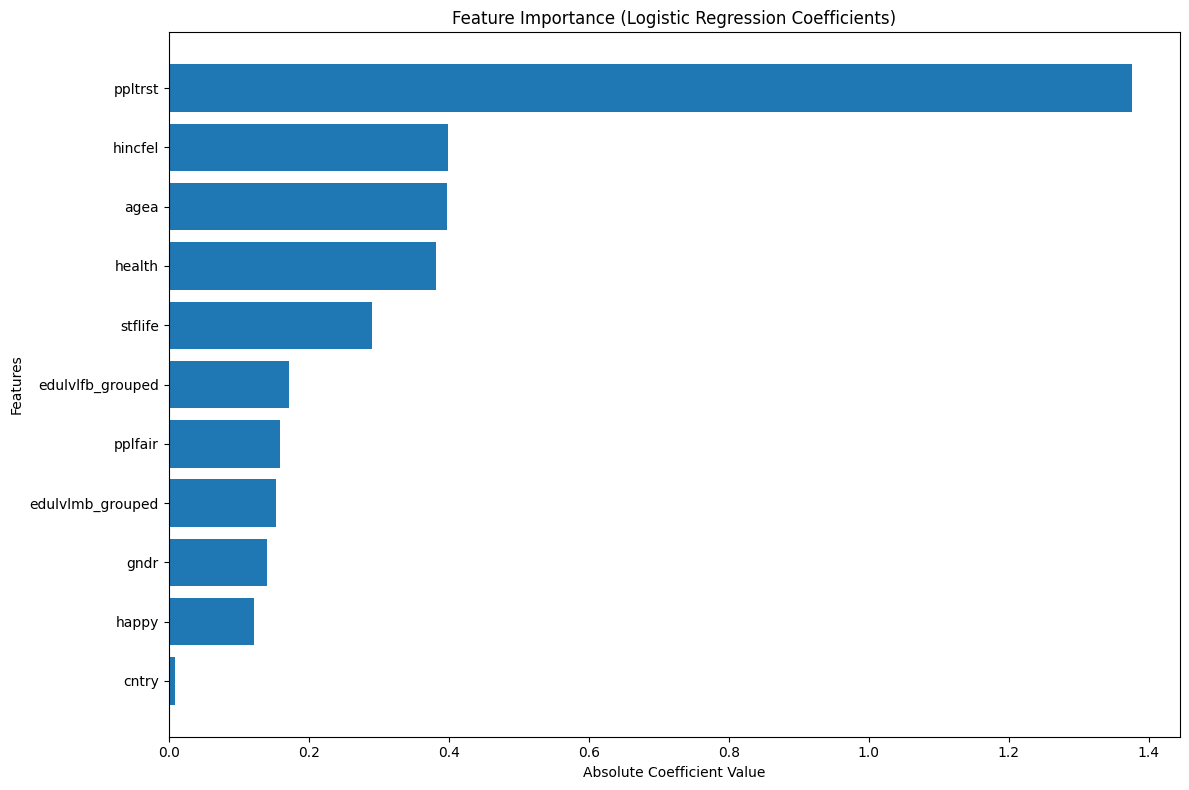

In [55]:
# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.gca().invert_yaxis()  # Most important feature at the top
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.tight_layout()
plt.show()